In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Tensorflow_FILES/DATA/lending_club_loan_two.csv')

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [4]:
df.drop(['emp_title','purpose','title','address','earliest_cr_line'],axis=1,inplace=True)

In [5]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

In [6]:
import re
def return_years(x):
    if(pd.isna(x)):
        return 0
    else:
        t=re.findall(r"\d+",x)
        return int(t[0])

df['emp_length']=df['emp_length'].apply(return_years)

In [7]:
avg_emp_length=df['emp_length'].mean()

In [8]:
df['emp_length']=df['emp_length'].apply(lambda x:avg_emp_length if x==0 else x)

<AxesSubplot: xlabel='loan_status', ylabel='count'>

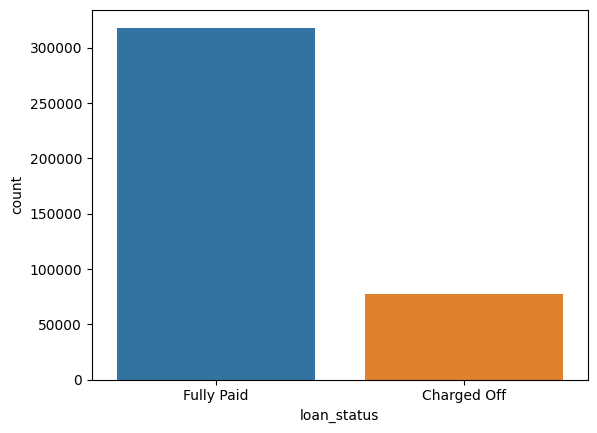

In [9]:
sns.countplot(data=df,x='loan_status')

In [10]:
mean_mort_acc=df['mort_acc'].mean()
df['mort_acc']=df['mort_acc'].apply(lambda x: mean_mort_acc if pd.isna(x)==True else x)

In [11]:
df=df.dropna()

In [12]:
def return_years2(x):
        t=re.findall(r"\d+",x)
        return int(t[0])
df['term']=df['term'].apply(return_years2)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   emp_length            395219 non-null  float64
 7   home_ownership        395219 non-null  object 
 8   annual_inc            395219 non-null  float64
 9   verification_status   395219 non-null  object 
 10  issue_d               395219 non-null  int64  
 11  loan_status           395219 non-null  int64  
 12  dti                   395219 non-null  float64
 13  open_acc              395219 non-null  float64
 14  pub_rec               395219 non-null  float64
 15  

In [14]:
df['loan_status']=df['loan_status'].apply(lambda x:1 if x=='Fully Paid' else 0)

In [17]:
df['issue_d']=pd.to_datetime(df['issue_d'])
df['issue_d']=df['issue_d'].apply(lambda x:x.year)
df['issue_d'].unique()

array([2015, 2014, 2013, 2012, 2016, 2011, 2010, 2008, 2009, 2007])

In [30]:
df['home_ownership']=df['home_ownership'].apply(lambda x: 'OTHER' if (x=='RENT' or x=='OTHER'or x=='ANY') else x)
df['home_ownership'].unique()

array(['OTHER', 'MORTGAGE', 'OWN', 'NONE'], dtype=object)

In [35]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [36]:
initial_list_status_classes=pd.get_dummies(df['initial_list_status'],drop_first=True)
grade_classes=pd.get_dummies(df['grade'],drop_first=True)
application_type_classes=pd.get_dummies(df['application_type'],drop_first=True)
home_ownership_classes=pd.get_dummies(df['home_ownership'],drop_first=True)
application_type=pd.get_dummies(df['application_type'],drop_first=True)

In [37]:

df2=pd.concat([initial_list_status_classes,grade_classes,application_type_classes,home_ownership_classes,application_type,df],axis=1)
df2.drop(['grade','sub_grade','initial_list_status','verification_status','home_ownership','application_type'],axis=1,inplace=True)


In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   w                     395219 non-null  uint8  
 1   B                     395219 non-null  uint8  
 2   C                     395219 non-null  uint8  
 3   D                     395219 non-null  uint8  
 4   E                     395219 non-null  uint8  
 5   F                     395219 non-null  uint8  
 6   G                     395219 non-null  uint8  
 7   INDIVIDUAL            395219 non-null  uint8  
 8   JOINT                 395219 non-null  uint8  
 9   NONE                  395219 non-null  uint8  
 10  OTHER                 395219 non-null  uint8  
 11  OWN                   395219 non-null  uint8  
 12  INDIVIDUAL            395219 non-null  uint8  
 13  JOINT                 395219 non-null  uint8  
 14  loan_amnt             395219 non-null  float64
 15  

In [41]:
X=df2.drop('loan_status',axis=1).values
y=df2['loan_status'].values

<AxesSubplot: >

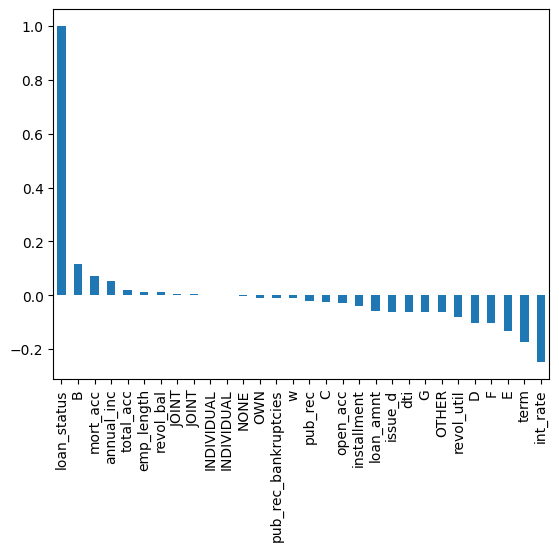

In [40]:
df2.corr()['loan_status'].sort_values(ascending=False).plot(kind='bar')

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler=MinMaxScaler()

In [46]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [50]:
model=Sequential()

model.add(Dense(29,activation='relu'))
model.add(Dense(15,activation='relu'))
#FOR BINARY CLASSIFICATION BETWEEN MALIGNANT AND BENIGN
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [67]:
y_train.shape

(276653,)

In [68]:
model.fit(X_train,y_train,verbose=1,epochs=25,validation_data=(X_test,y_test))

Epoch 1/25
8646/8646 [==============================] - 5s 549us/step - loss: 0.4563 - val_loss: 0.4493
Epoch 2/25
8646/8646 [==============================] - 4s 477us/step - loss: 0.4565 - val_loss: 0.4497
Epoch 3/25
8646/8646 [==============================] - 4s 480us/step - loss: 0.4564 - val_loss: 0.4511
Epoch 4/25
8646/8646 [==============================] - 4s 482us/step - loss: 0.4563 - val_loss: 0.4521
Epoch 5/25
8646/8646 [==============================] - 4s 480us/step - loss: 0.4563 - val_loss: 0.4496
Epoch 6/25
8646/8646 [==============================] - 4s 477us/step - loss: 0.4561 - val_loss: 0.4491
Epoch 7/25
8646/8646 [==============================] - 4s 479us/step - loss: 0.4565 - val_loss: 0.4500
Epoch 8/25
8646/8646 [==============================] - 4s 480us/step - loss: 0.4565 - val_loss: 0.4512
Epoch 9/25
8646/8646 [==============================] - 4s 477us/step - loss: 0.4566 - val_loss: 0.4502
Epoch 10/25
8646/8646 [==============================] - 4s 481u

KeyboardInterrupt: 

In [53]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot: >

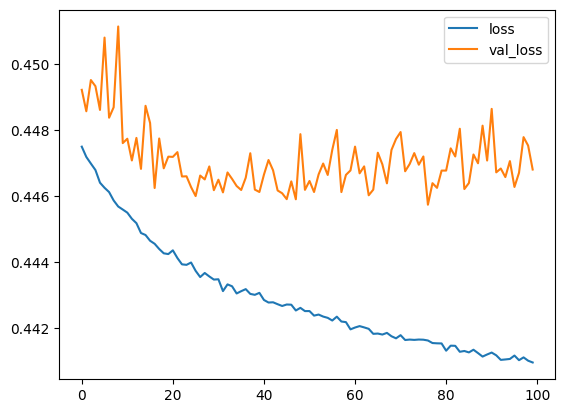

In [54]:
losses.plot()

In [69]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [70]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(rate=.5)) #rate is the percent of neurons to turn of randomly  between - .2 or .5

model.add(Dense(15,activation='relu'))
model.add(Dropout(rate=.5))

#FOR BINARY CLASSIFICATION BETWEEN MALIGNANT AND BENIGN
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [71]:
model.fit(X_train,y_train,verbose=1,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
8646/8646 [==============================] - 5s 487us/step - loss: 0.4738 - val_loss: 0.4602
Epoch 2/600
8646/8646 [==============================] - 4s 476us/step - loss: 0.4641 - val_loss: 0.4595
Epoch 3/600
8646/8646 [==============================] - 4s 469us/step - loss: 0.4630 - val_loss: 0.4589
Epoch 4/600
8646/8646 [==============================] - 4s 470us/step - loss: 0.4625 - val_loss: 0.4588
Epoch 5/600
8646/8646 [==============================] - 4s 473us/step - loss: 0.4615 - val_loss: 0.4586
Epoch 6/600
8646/8646 [==============================] - 4s 470us/step - loss: 0.4617 - val_loss: 0.4571
Epoch 7/600
8646/8646 [==============================] - 4s 470us/step - loss: 0.4610 - val_loss: 0.4574
Epoch 8/600
8646/8646 [==============================] - 4s 470us/step - loss: 0.4606 - val_loss: 0.4583
Epoch 9/600
8646/8646 [==============================] - 4s 470us/step - loss: 0.4603 - val_loss: 0.4568
Epoch 10/600
8646/8646 [==============================]

<AxesSubplot: >

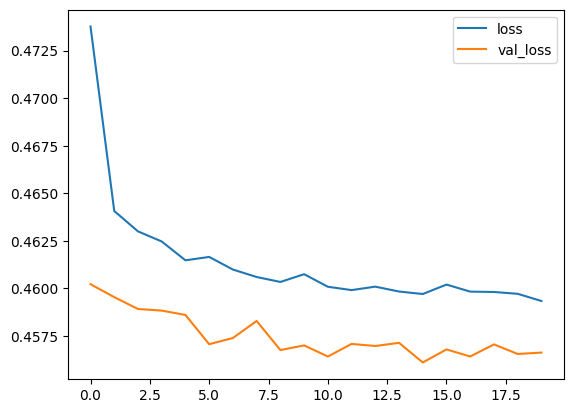

In [73]:
pd.DataFrame(model.history.history).plot()

In [74]:
predictions=model.predict(X_test)

3706/3706 [==============================] - 1s 260us/step


In [75]:
from sklearn.metrics import classification_report,confusion_matrix
for i in range(0,len(predictions)):
    if(predictions[i]<.5):
        predictions[i]=0
    else:
        predictions[i]=1
pd.DataFrame(classification_report(y_test,predictions,output_dict=True)).transpose()

/Users/rayanbhat/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rayanbhat/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rayanbhat/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,23363.000000
1,0.802954,1.000000,0.890709,95203.000000
accuracy,0.802954,0.802954,0.802954,0.802954
macro avg,0.401477,0.500000,0.445355,118566.000000
weighted avg,0.644735,0.802954,0.715198,118566.000000
